In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [78]:
df = pd.read_excel('2020.xlsx')
print(df.head())
print(df.describe())
print(df.info())



   ST_CASE  YEAR  STATE  COUNTY  FATALS  A_CRAINJ  A_REGION  A_RU  A_INTER   
0    10001  2020      1      51       3         1         4     1        2  \
1    10002  2020      1      73       1         1         4     2        2   
2    10003  2020      1     117       1         1         4     1        2   
3    10004  2020      1      15       1         1         4     1        2   
4    10005  2020      1      37       1         1         4     1        2   

   A_RELRD  ...  A_D65PLS  A_D21_24  A_D16_24  A_RD  A_HR  A_DIST  A_DROWSY   
0        4  ...         2         1         1     1     2       2         2  \
1        1  ...         1         2         2     2     2       2         2   
2        4  ...         2         2         2     1     2       2         2   
3        4  ...         2         2         1     1     2       2         2   
4        4  ...         2         2         2     1     2       2         2   

   BIA  SPJ_INDIAN  INDIAN_RES  
0    0           0     

In [79]:
#print(df.dtypes)
missing_values = df.isnull().sum()
print(missing_values)


ST_CASE       0
YEAR          0
STATE         0
COUNTY        0
FATALS        0
A_CRAINJ      0
A_REGION      0
A_RU          0
A_INTER       0
A_RELRD       0
A_INTSEC      0
A_ROADFC      0
A_JUNC        0
A_MANCOL      0
A_TOD         0
A_DOW         0
A_CT          0
A_WEATHER     0
A_LT          0
A_MC          0
A_SPCRA       0
A_PED         0
A_PED_F       0
A_PEDAL       0
A_PEDAL_F     0
A_ROLL        0
A_POLPUR      0
A_POSBAC      0
A_D15_19      0
A_D16_19      0
A_D15_20      0
A_D16_20      0
A_D65PLS      0
A_D21_24      0
A_D16_24      0
A_RD          0
A_HR          0
A_DIST        0
A_DROWSY      0
BIA           0
SPJ_INDIAN    0
INDIAN_RES    0
dtype: int64


In [80]:
duplicates = df.duplicated().sum()
print(duplicates)

0


EDA

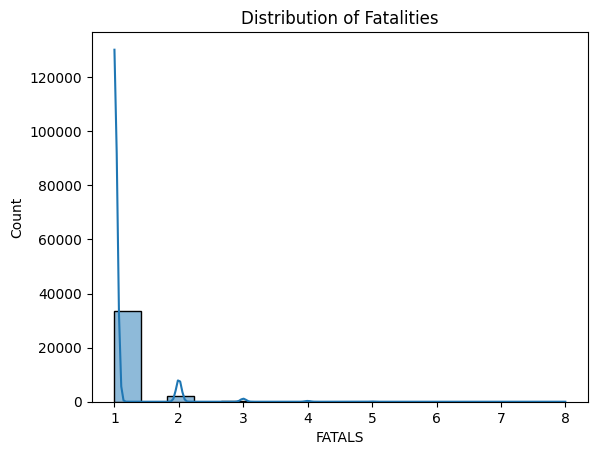

In [81]:
sns.histplot(df['FATALS'], kde=True)
plt.title('Distribution of Fatalities')
plt.show()



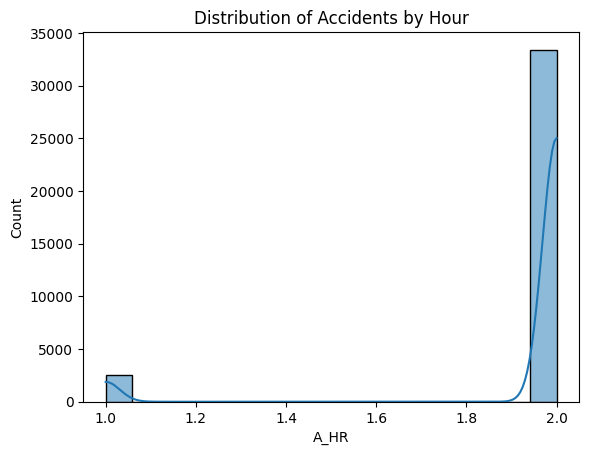

In [82]:
# Distribution of 'A_HOUR' column
sns.histplot(df['A_HR'], kde=True)
plt.title('Distribution of Accidents by Hour')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

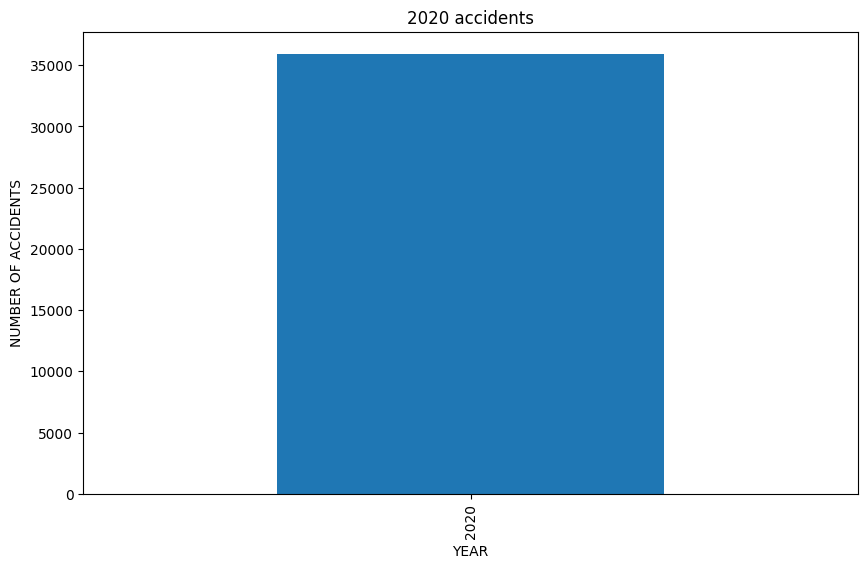

In [83]:
plt.figure(figsize=(10,6))
df.groupby('YEAR').size().plot(kind='bar')
plt.title('2020 accidents')
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF ACCIDENTS')
plt.show

1.Trends in Accident Occurrences Over Time

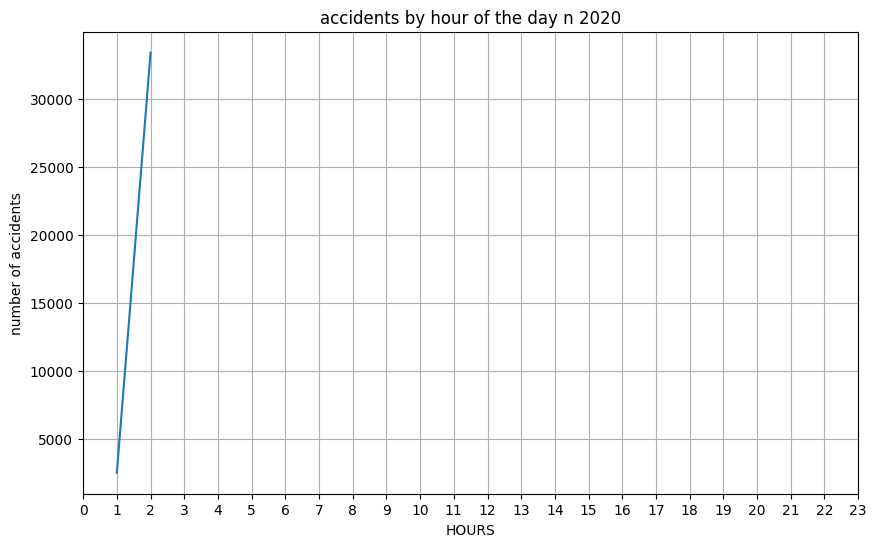

In [84]:
df['A_HR'] = df['A_HR'].astype (int)
hourly_accidents = df.groupby('A_HR').size()
plt.figure(figsize=(10,6))
hourly_accidents.plot(kind= 'line')
plt.xlabel('HOURS')
plt.ylabel('number of accidents')
plt.title("accidents by hour of the day n 2020")
plt.grid(True)
plt.xticks(range(24))
plt.show()

2. Correlation Between Weather Conditions and Accidents

In [85]:
df['A_WEATHER'] = df['A_WEATHER'].replace(99,np.nan)
df = df.dropna(subset=['A_WEATHER'])
weather_mapping = {
    1 : 'sunny',
    2: 'cloudy',
    3 : 'Rainy',
    13: 'foggy'
}
df['A_WEATHER'] = df['A_WEATHER'].map(weather_mapping)


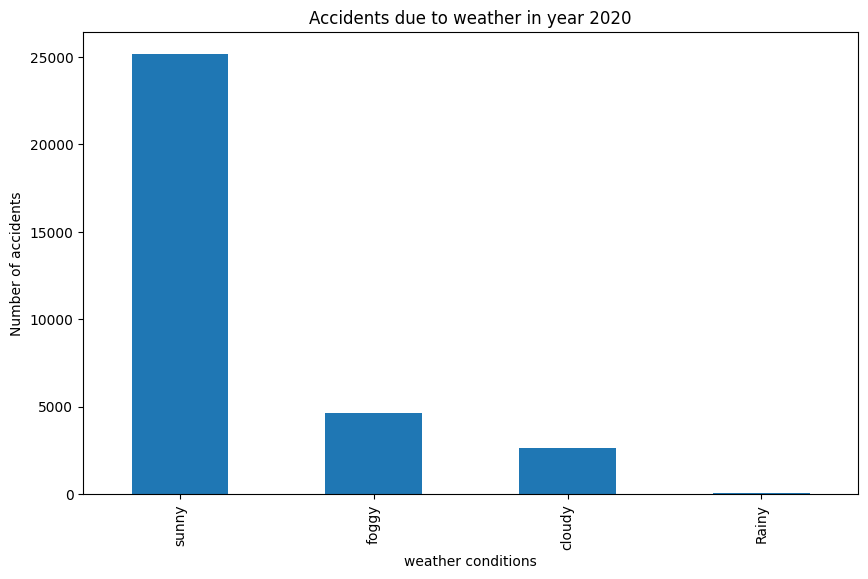

In [86]:
plt.figure(figsize=(10,6))
weather_acidents = df['A_WEATHER'].value_counts()
weather_acidents.plot(kind='bar')
plt.title("Accidents due to weather in year 2020")
plt.xlabel('weather conditions')
plt.ylabel('Number of accidents')

plt.show()

3. Hotspots for Traffic Accidents


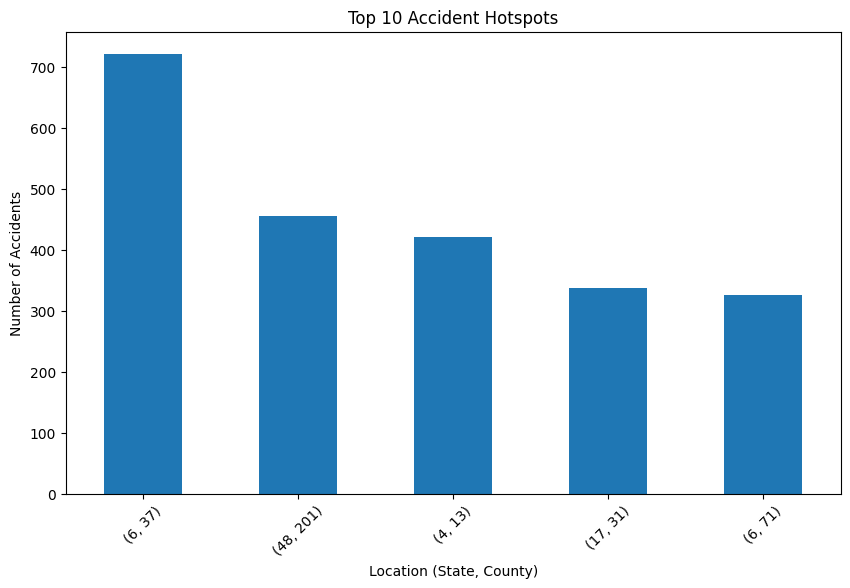

In [90]:
location_accidents = df.groupby(['STATE','COUNTY']).size().sort_values(ascending=False).head(5)
plt.figure(figsize=(10,6))
location_accidents.plot(kind="bar")
location_accidents.plot(kind='bar')
plt.title('Top 10 Accident Hotspots')
plt.xlabel('Location (State, County)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()